In [1]:
# 最终画图选的参数：
# DG 10 3 10
# EG 20 3 15
# zebrafish 20 3 10

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scanpy as sc
from scipy.sparse import csr_matrix
import scvelo as scv
from torch.optim import SGD, Adam, Adagrad
from function import *

from utils import *
from g2g_model_Fisher import *


In [3]:
data_path = "/home/linux/桌面/SCIM-main/main/data/branch_data/"
path_path = "/home/linux/桌面/Is single cell sloppy?/4_FI_vs_Velocity/RC_path/"
figure_path="/home/linux/桌面/Is single cell sloppy?/14_画图/figure/cv_2/"
cmap = plt.colormaps['Spectral_r']
save = True

computing neighbors
    finished (0:00:01) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
AnnData object with n_obs × n_vars = 3386 × 600
    obs: 'split_id', 'sample', 'Size_Factor', 'condition', 'Cluster', 'celltype', 'umap_1', 'umap_2', 'batch', 'n_counts'
    var: 'n_cells', 'gene_count_corr', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes'
    uns: 'Cell_type_colors', 'hvg', 'log1p', 'neighbors', 'pca', 'umap', 'velocity_params'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'Ms', 'Mu', 'spliced', 'unspliced', 'velocity', 'variance_velocity'
    obsp: 'connectivities', 'distanc

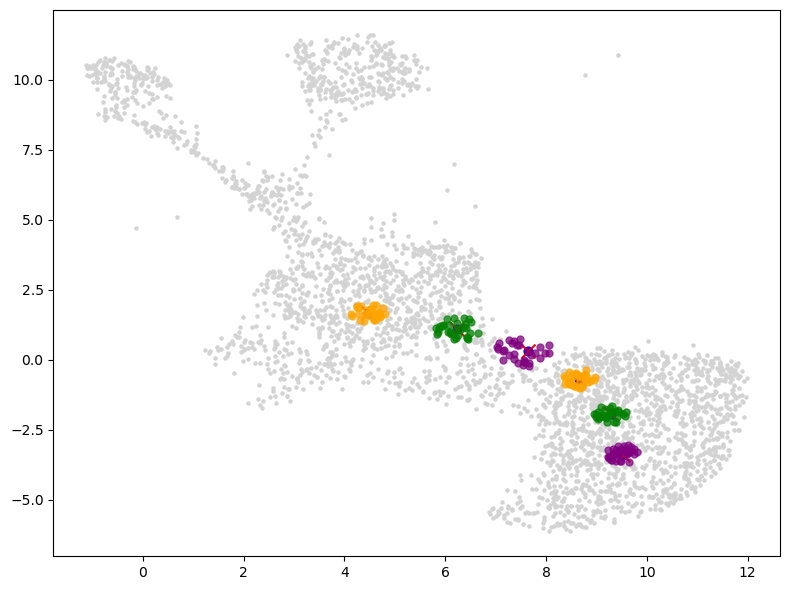

用的color_dict是： {'Melanophore': '#279e68', 'Other Glia': '#aa40fc', 'Pigment Progenitor': '#8c564b', 'Proliferating Progenitor': '#e377c2', 'Schwann Cell': '#17becf', 'Schwann Cell Precursor': '#aec7e8', 'Xanthophore': '#98df8a'}
用的celltype_colors是： ['#17becf', '#17becf', '#17becf', '#17becf', '#17becf', '#279e68', '#279e68', '#aec7e8', '#e377c2', '#98df8a', '#279e68', '#279e68', '#98df8a', '#279e68', '#98df8a', '#98df8a', '#98df8a', '#279e68', '#98df8a', '#aec7e8', '#17becf', '#98df8a', '#98df8a', '#98df8a', '#17becf', '#279e68', '#279e68', '#98df8a', '#98df8a', '#98df8a', '#8c564b', '#279e68', '#17becf', '#17becf', '#17becf', '#279e68', '#98df8a', '#17becf', '#279e68', '#98df8a', '#98df8a', '#98df8a', '#98df8a', '#98df8a', '#279e68', '#279e68', '#98df8a', '#98df8a', '#98df8a', '#17becf', '#98df8a', '#17becf', '#98df8a', '#17becf', '#17becf', '#98df8a', '#279e68', '#17becf', '#279e68', '#98df8a', '#279e68', '#17becf', '#17becf', '#98df8a', '#17becf', '#17becf', '#98df8a', '#98df8a', '#

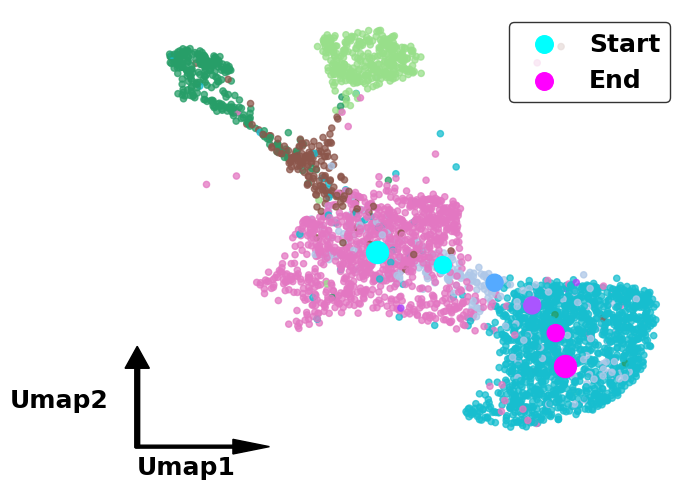

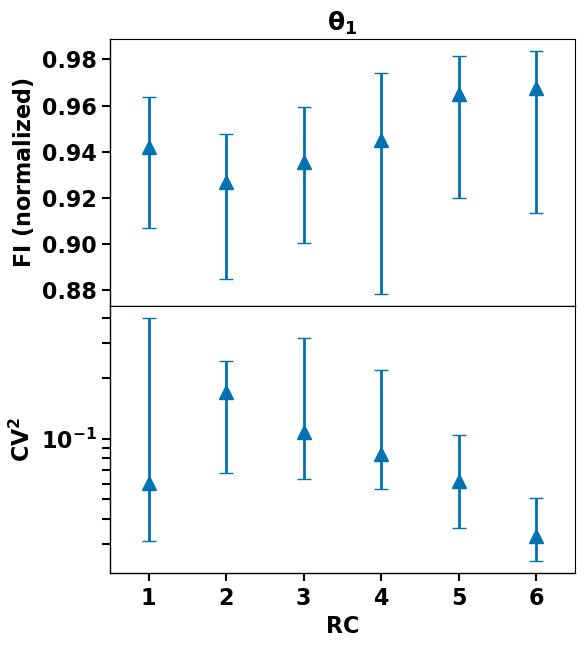

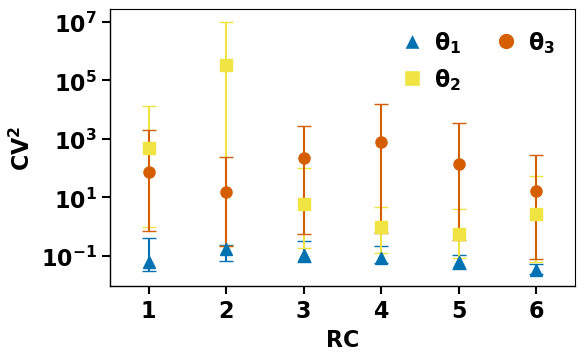

pca_svd_rc_mean_all:
[[[-2.04148459e+00  4.32968363e-02 -1.28390864e-01]
  [-1.85273027e+00  8.81251842e-02 -1.26516327e-01]
  [-1.97345757e+00  2.00302362e-01 -3.37046087e-01]
  [ 1.99444091e+00  5.16358800e-02 -1.96787208e-01]
  [-1.53253806e+00  4.43384558e-01  8.59931409e-02]
  [ 2.01709604e+00  1.12989172e-01 -4.05178070e-02]
  [ 1.95873332e+00  3.62015367e-01 -2.40845412e-01]
  [ 1.90289271e+00  1.71432152e-01 -1.27833501e-01]
  [ 1.82303238e+00  8.61060098e-02  1.18122533e-01]
  [-1.99260378e+00  1.69077948e-01 -2.31498003e-01]
  [-1.99323606e+00 -5.44901099e-03 -1.75788745e-01]
  [-1.86086953e+00  3.25134158e-01  1.43569484e-01]
  [ 1.88565683e+00  2.18549386e-01 -1.76399425e-01]
  [-2.00565028e+00  8.85638967e-02 -2.88397253e-01]
  [ 1.77214873e+00  5.99256277e-01  4.76417333e-01]
  [-1.56802952e+00  2.24793196e-01  1.61486417e-01]
  [-1.97422636e+00  6.56502545e-02 -2.93956190e-01]
  [ 1.88751209e+00  4.36297953e-01 -1.58361137e-01]
  [ 1.85264742e+00  2.57522553e-01 -5.55586

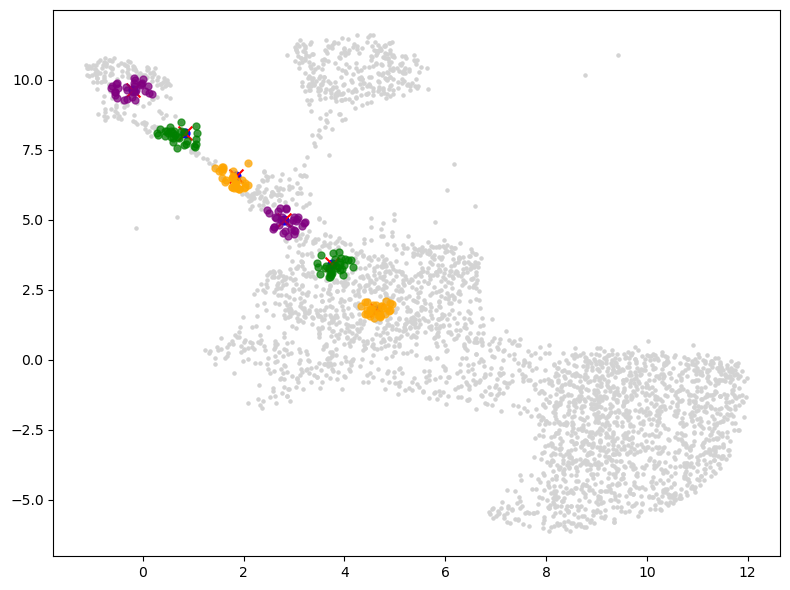

用的color_dict是： {'Melanophore': '#279e68', 'Other Glia': '#aa40fc', 'Pigment Progenitor': '#8c564b', 'Proliferating Progenitor': '#e377c2', 'Schwann Cell': '#17becf', 'Schwann Cell Precursor': '#aec7e8', 'Xanthophore': '#98df8a'}
用的celltype_colors是： ['#17becf', '#17becf', '#17becf', '#17becf', '#17becf', '#279e68', '#279e68', '#aec7e8', '#e377c2', '#98df8a', '#279e68', '#279e68', '#98df8a', '#279e68', '#98df8a', '#98df8a', '#98df8a', '#279e68', '#98df8a', '#aec7e8', '#17becf', '#98df8a', '#98df8a', '#98df8a', '#17becf', '#279e68', '#279e68', '#98df8a', '#98df8a', '#98df8a', '#8c564b', '#279e68', '#17becf', '#17becf', '#17becf', '#279e68', '#98df8a', '#17becf', '#279e68', '#98df8a', '#98df8a', '#98df8a', '#98df8a', '#98df8a', '#279e68', '#279e68', '#98df8a', '#98df8a', '#98df8a', '#17becf', '#98df8a', '#17becf', '#98df8a', '#17becf', '#17becf', '#98df8a', '#279e68', '#17becf', '#279e68', '#98df8a', '#279e68', '#17becf', '#17becf', '#98df8a', '#17becf', '#17becf', '#98df8a', '#98df8a', '#

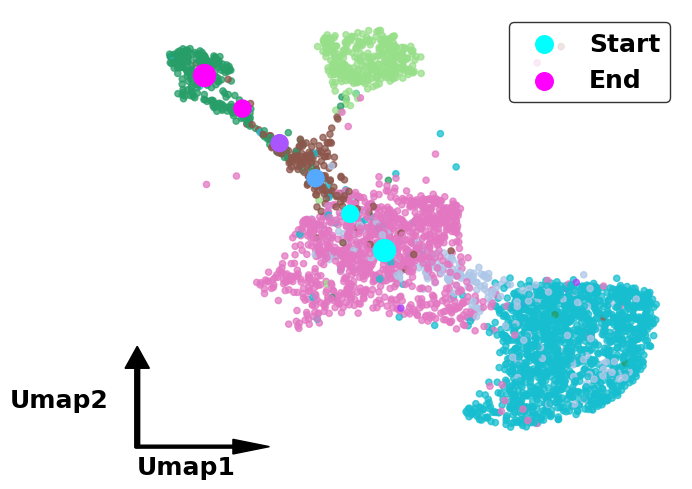

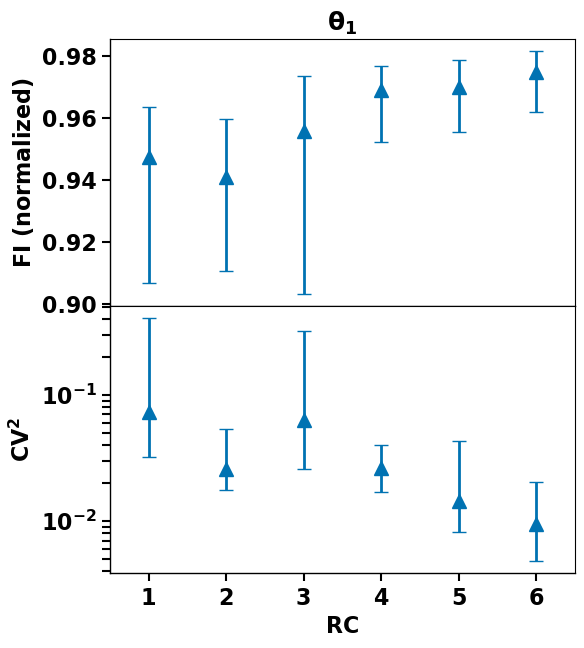

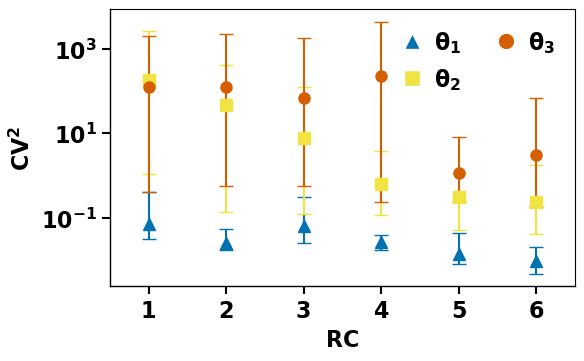

pca_svd_rc_mean_all:
[[[-1.905479   -0.14373666 -0.19972023]
  [ 1.7492836   0.34762257 -0.14837694]
  [-1.9391462   0.01151577 -0.2494037 ]
  [-1.4954543   0.23005703  0.02639471]
  [-1.9154458   0.274768   -0.20495959]
  [-1.9022299   0.06419761 -0.33579776]
  [ 1.7813385   0.51494807 -0.310964  ]
  [-1.6693776   0.18759929  0.28017756]
  [-1.7280103  -0.2316028  -0.01401319]
  [-1.7877808  -0.08392574  0.4578749 ]
  [-1.9709716  -0.01281798 -0.2127878 ]
  [-1.8846799  -0.07710581 -0.25732812]
  [-1.9070473   0.21758409  0.18101229]
  [-1.898058   -0.19156733 -0.35852   ]
  [ 1.818659    0.22872609 -0.196527  ]
  [ 1.5674388   0.5636414  -0.09238002]
  [-1.5777249   0.1506433   0.14040644]
  [-1.8612113  -0.145485    0.02475238]
  [-2.004663    0.11892698 -0.01112278]
  [-1.5713351  -0.11311377 -0.36804035]
  [ 1.8818107   0.28894898 -0.11233013]
  [-1.7415729  -0.31078905 -0.15857029]
  [-1.8145937  -0.07456207 -0.06832172]
  [ 1.7945361   0.34495962 -0.10433968]
  [-1.9814184   0.3

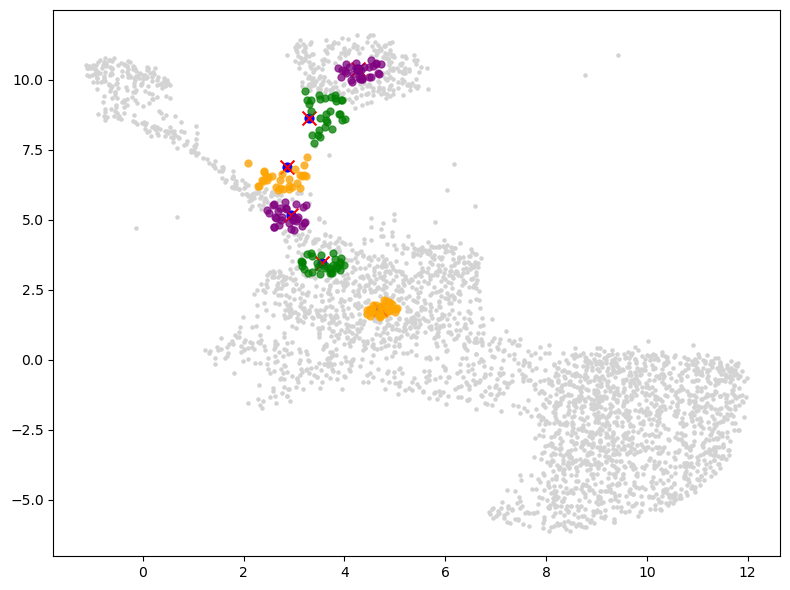

用的color_dict是： {'Melanophore': '#279e68', 'Other Glia': '#aa40fc', 'Pigment Progenitor': '#8c564b', 'Proliferating Progenitor': '#e377c2', 'Schwann Cell': '#17becf', 'Schwann Cell Precursor': '#aec7e8', 'Xanthophore': '#98df8a'}
用的celltype_colors是： ['#17becf', '#17becf', '#17becf', '#17becf', '#17becf', '#279e68', '#279e68', '#aec7e8', '#e377c2', '#98df8a', '#279e68', '#279e68', '#98df8a', '#279e68', '#98df8a', '#98df8a', '#98df8a', '#279e68', '#98df8a', '#aec7e8', '#17becf', '#98df8a', '#98df8a', '#98df8a', '#17becf', '#279e68', '#279e68', '#98df8a', '#98df8a', '#98df8a', '#8c564b', '#279e68', '#17becf', '#17becf', '#17becf', '#279e68', '#98df8a', '#17becf', '#279e68', '#98df8a', '#98df8a', '#98df8a', '#98df8a', '#98df8a', '#279e68', '#279e68', '#98df8a', '#98df8a', '#98df8a', '#17becf', '#98df8a', '#17becf', '#98df8a', '#17becf', '#17becf', '#98df8a', '#279e68', '#17becf', '#279e68', '#98df8a', '#279e68', '#17becf', '#17becf', '#98df8a', '#17becf', '#17becf', '#98df8a', '#98df8a', '#

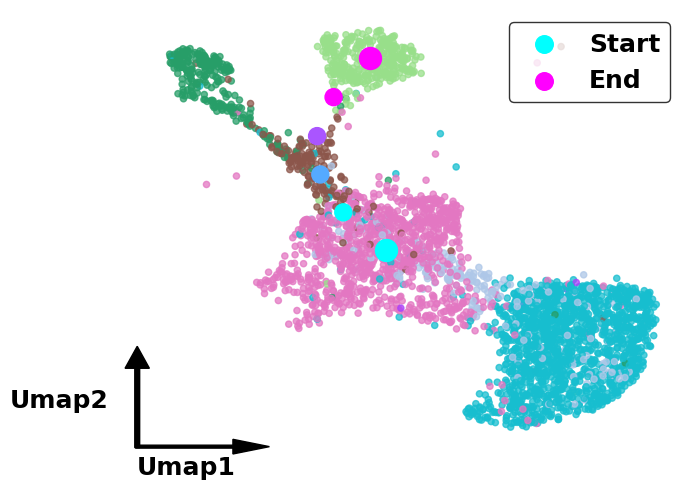

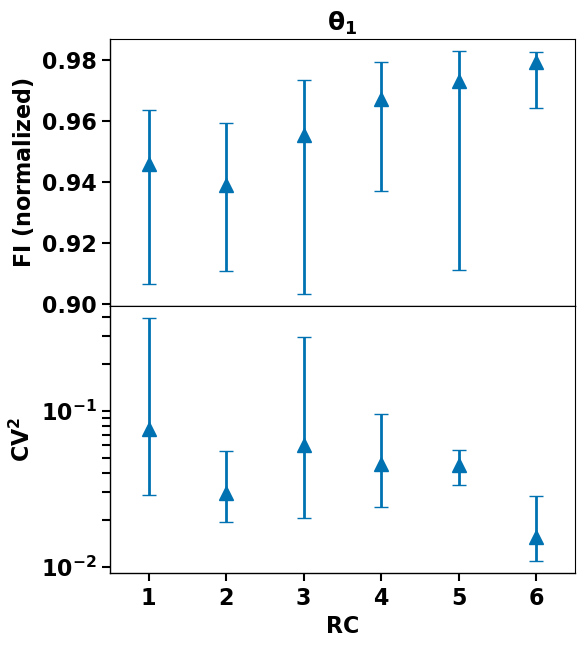

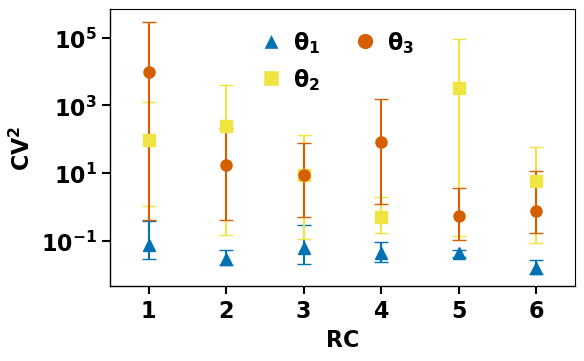

pca_svd_rc_mean_all:
[[[-1.90575910e+00  2.80544192e-01 -1.71355575e-01]
  [-1.89559436e+00 -1.48165956e-01 -1.40527308e-01]
  [-1.67574883e+00  1.84561253e-01  2.38583967e-01]
  [-1.72795224e+00 -2.23578244e-01  1.77207831e-02]
  [-1.94480669e+00  2.15315558e-02 -1.97632268e-01]
  [-1.89540219e+00 -1.83851570e-01 -3.28159183e-01]
  [ 1.72270501e+00  3.58460963e-01 -1.33145884e-01]
  [-1.76583374e+00 -7.78305978e-02  4.23933059e-01]
  [-1.45600486e+00  1.76426038e-01 -6.66509557e-04]
  [-1.89399850e+00  7.41899535e-02 -3.01581085e-01]
  [-1.59534419e+00 -9.66655239e-02 -3.19162250e-01]
  [-1.99177539e+00  1.18156321e-01 -3.34118716e-02]
  [ 1.53245544e+00  5.76571763e-01 -8.30454156e-02]
  [-1.87489581e+00 -6.91400096e-02 -2.12838694e-01]
  [-1.95022261e+00 -1.70654282e-02 -1.72532827e-01]
  [ 1.75839460e+00  5.08419275e-01 -2.83519268e-01]
  [-1.89343715e+00  2.16388032e-01  2.21905723e-01]
  [-1.59566486e+00  1.75668150e-01  1.19146131e-01]
  [ 1.79681540e+00  2.27941930e-01 -1.63520

In [4]:
data_name = "zebrafish_dynamo_part"
[k_nei, K, L] = [20, 3, 10]
[pca_dim, k_rc, d_pca] = [50, 30, 10]

clusters_name = "celltype"
root_cluster = "Ngn3 low EP"
loc_path_graph = 'upper right'
basis = "umap"

branch = [ np.array(['Proliferating Progenitor', 'Schwann Cell Precursor', 'Schwann Cell']), 
          np.array(['Proliferating Progenitor', 'Pigment Progenitor', 'Melanophore']),
          np.array(['Proliferating Progenitor', 'Pigment Progenitor', 'Xanthophore']) ]
for t_list in (branch):
    branch_name = t_list[-1]

    adata0 = scv.read(data_path+data_name+'.h5ad', cache=True)
    adata = adata0.copy()
    scv.pp.pca(adata, n_comps=pca_dim)
    scv.pp.neighbors(adata, n_neighbors=k_nei)
    scv.pp.moments(adata, n_pcs=pca_dim, n_neighbors=k_nei)
    scv.tl.velocity(adata)
    print(adata)

    if branch_name == "Schwann Cell":
        nrc = 7
    else:
        nrc = 5

    # average_path = np.load(path_path + f'{data_name}_{branch_name}_P2M_rc_nrc_{nrc}_dpca_{d_pca}.npy') 
    # cell_arr, nearest_cell = find_nearest_indices_voronoi(adata = adata, path0= average_path, rc_distance= "X_pca", n_nei=k_rc, dim_n=10)
    # average_path = np.array(adata[nearest_cell].obsm["X_umap"])[:5]
    # cell_arr = cell_arr[:5] 
    for nrc in [6]:
        average_path = np.load(path_path + f'{data_name}_{branch_name}_P2M_rc_nrc_{nrc}.npy') 
        print("average_path.shape", average_path.shape)
        cell_arr, nearest_cell = find_nearest_indices_voronoi(adata = adata, path0= average_path, n_nei = k_rc, rc_distance= "X_umap")
        
        # fig = sc.pl.embedding(
        #     adata,
        #     # color=[clusters_name, "paga"],
        #     color=[clusters_name],
        #     basis="pca",
        #     color_map=cmap,
        #     return_fig=True
        # )

        X_pca = adata.obsm['X_pca']
        row = np.array([np.ones((k_nei,))*i for i in range(adata.shape[0])]).flatten()
        col = adata.uns['neighbors']['indices'].flatten()
        w_val = np.array([np.linalg.norm(X_pca[int(i),:]-X_pca[int(j),:]) for i,j in zip(row,col)])
        adj_val = np.ones(col.shape)
        A_mat = csr_matrix((adj_val, (row, col)), shape=(adata.shape[0], adata.shape[0]))
        A = A_mat
        W_mat = csr_matrix((w_val, (row, col)), shape=(adata.shape[0], adata.shape[0]))
        dc=np.mean(w_val)
        cell_nei=adata.uns['neighbors']['indices']
        nei_w=[]
        rho_arr=[]
        for ni in adata.uns['neighbors']['indices']:
            dij=np.array([np.linalg.norm(X_pca[int(ni[0]),:]-X_pca[int(i),:]) for i in ni[1:]])
            rho=np.sum(np.exp(-dij**2/dc**2))
            nei_w.append(np.exp(-dij**2/dc**2)/np.sum(np.exp(-dij**2/dc**2)))
            rho_arr.append(rho)
            
        rho_arr=np.array(rho_arr)/np.amax(rho_arr)
        nei_w=np.array(nei_w)
        nei_w=np.hstack((np.ones((nei_w.shape[0],1)),nei_w))/2

        def smooth_func(X_val,cell_nei=cell_nei,nei_w=nei_w):
            X_s=X_val.copy()
            for ci in range(len(X_val)):
                X_s[ci]=np.dot(X_val[cell_nei[ci,:]],nei_w[ci,:])
            return X_s

        if basis == "umap":
            X_umap = adata.obsm['X_umap']
            X_plt = X_umap[:,0]
            Y_plt = X_umap[:,1]
            X_min = np.min(X_plt)
            X_max = np.max(X_plt)
            Y_min = np.min(Y_plt)
            Y_max = np.max(Y_plt)
            X_len = (X_max-X_min)/5
            Y_len = (Y_max-Y_min)/5
            wid = min(X_len,Y_len)/30
            X_ori = X_min-wid*10
            Y_ori = Y_min-wid*10
        elif basis == "pca":
            X_umap = adata.obsm['X_pca'][:, :2]
            X_plt = X_umap[:,0]
            Y_plt = X_umap[:,1]
            X_min = np.min(X_plt)
            X_max = np.max(X_plt)
            Y_min = np.min(Y_plt)
            Y_max = np.max(Y_plt)
            X_len = (X_max-X_min)/5
            Y_len = (Y_max-Y_min)/5
            wid = min(X_len,Y_len)/30
            X_ori = X_min-wid*10
            Y_ori = Y_min-wid*10

        X = torch.tensor(adata.layers['Ms'], dtype=torch.float32) 
        Encoder_path = "/home/linux/桌面/Is single cell sloppy?/11_PAGA_spectrum/encoder/"
        # for pca in [X_pca, eigengene, hotspot]:

        model_path = Encoder_path + data_name+' '+str([k_nei,K,L])+'/'
        # eigengene = np.load(f"{model_path}cell_eigen_X.npy")
        # hotspot = np.load(f"{model_path}cell_hs_X.npy")
        model_name = f"{model_path}encoder.pt"
        model = torch.load(f'{model_name}')
        mu, sigma = model(torch.tensor(X))
        mu_learned = mu.detach().numpy()

        sigma_learned = sigma.detach().numpy()
        Fisher_g=np.zeros((X.shape[0],L*2,L*2))
        for i in range(X.shape[0]):
            for j in range(L):
                Fisher_g[i,j,j]=1/sigma_learned[i,j]**2
                Fisher_g[i,L+j,L+j]=2/sigma_learned[i,j]**2
        Fisher_g_diag = np.zeros([X.shape[0],L*2])
        for i in range(X.shape[0]):
            Fisher_g_diag[i] = np.diag(Fisher_g[i])
        ## 1_1这一步用了一个神经网络 pca -> Z(mu,sigma), 然后求出这个网络的pZ_pEg。
        for pca in [X_pca]:
            print("pca.shape:", pca.shape)
            reset_seeds(0) # 0
            model = nn.Sequential(
                nn.Linear(pca.shape[1], 128),
                nn.ReLU(),
                nn.Linear(128,64),
                nn.ReLU(),
                nn.Linear(64,2*L),
            )
            loss_fn = nn.MSELoss()
            optimizer = SGD(model.parameters(), lr=0.01, weight_decay=0.001)#, momentum=0.2
            x_in=torch.tensor(pca, dtype=torch.float32)
            latent_z = np.hstack((mu_learned,sigma_learned))
            x_out=torch.tensor(latent_z.astype(np.float32))
            for epoch in range(200): # 200
                # break
                optimizer.zero_grad()
                output = model(x_in)
                loss = loss_fn(output,x_out) 
                loss.backward()
                optimizer.step()
            pZ_ppca = p_out_p_in(pca, model, dim_out = 2 * L)

            ### 链式法则（已知FI_Z），求出FI_pca。
            FI_pca = np.einsum("ijk,ij,ijh->ikh",pZ_ppca, Fisher_g_diag, pZ_ppca)
            print("FI_pca.shape:", FI_pca.shape)
            # FI_Eg_diag = FI_Eg[:, range(eigengene.shape[1]), range(eigengene.shape[1])]
            # U_FI_Eg[i]的列向量是特征向量。Ax = /lamba x (从这可以看出x是列向量)
            # 不过U_FI_Eg[i]的行向量和列向量的模长都是1.而且行和行彼此正交。列和列彼此正交。这是因为UU_T = I. U是正交矩阵。
            U_FI_Eg, S_FI_Eg, Vt_FI_Eg = np.linalg.svd(FI_pca, full_matrices=False)
            print("svd后(U_FI_Eg, S_FI_Eg, Vt_FI_Eg)：",U_FI_Eg.shape, S_FI_Eg.shape, Vt_FI_Eg.shape)

            # rc_path(adata, mu_learned, sigma_learned, average_path, basis, k_nei, data_name)
            cell_arr_plot(average_path, cell_arr, X_umap)
            rc_path_celltype(adata, average_path, basis, data_name, save = save, figure_path = figure_path, branch_name  = branch_name)
                
            dim = 3
            # U_FI_Eg和pca的各列都是正交的才可以这么算。cell_i_的pca坐标（向量）点积u1得到的就是u1的坐标，这其实就是在u1上做投影。
            # NOTE:这可能是为什么eigengene和hotspot不行的原因，eigengene的各坐标系间不是正交的。
            pca_svd_rc_variance_all, pca_svd_rc_mean_all= compute_variances(U_FI_Eg, pca, cell_arr, k_rc= k_rc, L = L, simple=dim/2, cv= True)
            pca_svd_rc_variance_average = np.array([np.mean(arr, axis=0) for arr in pca_svd_rc_variance_all])

            # print("pca_svd_rc_variance_all.shape",pca_svd_rc_variance_all[0].shape)
            # plot_all_variances_odd(pca_svd_rc_variance_all, share_y = False)
            FI_VAR_double_grid(S_FI_Eg, pca_svd_rc_variance_all, pca, 0.5, cell_arr, norm=True, simple= False,
                            save = save, figure_path = figure_path, branch_name  = branch_name)

            exclude_indices = []
            all_indices = list(range(len(pca_svd_rc_variance_all)))
            keep_indices = [i for i in all_indices if i not in exclude_indices]
            new_array = np.array(pca_svd_rc_variance_all)[keep_indices]

            variance_along_rc(cell_arr, new_array, dim = dim, save = save, figure_path = figure_path, branch_name  = branch_name)

            print("pca_svd_rc_mean_all:")
            print(np.array(pca_svd_rc_mean_all))